# Task
Tell me about this dataset.

Here is all the data you need:
"Join_Features_to_CLT_zipcodes.csv"

## Data loading

### Subtask:
Load the dataset "Join_Features_to_CLT_zipcodes.csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset "Join_Features_to_CLT_zipcodes.csv" into a pandas DataFrame and display the first 5 rows.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('Join_Features_to_CLT_zipcodes.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Join_Features_to_CLT_zipcodes.csv' not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,po_name,shape_Leng,shape_Area,Shape__Area,Shape__Length,zipInt,zip,Join_Count,CreationDate_MIN,ObjectId,Population
0,CHARLOTTE,30773.79891,4.981543e+07,6.953170e+06,11499.27819,28202,28202,113,2020/04/02 20:30:04.700+00,5,"8,939.40"
1,HARRISBURG,10472.13397,2.431967e+06,3.404904e+05,3916.88583,28075,28075,100,2020/04/02 20:29:00.805+00,2,NaN
2,CHARLOTTE,48420.35804,8.975605e+07,1.252203e+07,18089.01717,28203,28203,242,2020/04/02 20:30:18.094+00,6,"5,740.60"
3,CHARLOTTE,38924.33194,4.872408e+07,6.798648e+06,14542.69975,28204,28204,119,2020/04/02 20:34:04.075+00,36,"5,400.90"
4,CHARLOTTE,101303.70920,3.396873e+08,4.740434e+07,37845.23711,28205,28205,544,2020/04/02 19:52:00.399+00,35,"4,320.50"


## Data exploration

### Subtask:
Explore the loaded dataset to understand its basic characteristics.


**Reasoning**:
Explore the dataset's characteristics as instructed, including data types, descriptive statistics, unique values, and missing values.  Pay special attention to the 'Population' column's data type and values.



In [ ]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Check data types
print("\nData Types:\n", df.dtypes)

# Descriptive statistics for numerical columns
print("\nDescriptive Statistics:\n", df.describe())

# Explore categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values and frequencies for '{col}':\n{df[col].value_counts()}")

# Identify missing values
print("\nMissing Values:\n", df.isnull().sum())

# Observations about the population column
print(f"\nPopulation column data type: {df['Population'].dtype}")
print("\nObservations about Population column:")
print(df['Population'].unique())

Shape of the DataFrame: (39, 11)

Data Types:
 po_name              object
shape_Leng          float64
shape_Area          float64
Shape__Area         float64
Shape__Length       float64
zipInt                int64
zip                   int64
Join_Count            int64
CreationDate_MIN     object
ObjectId              int64
Population           object
dtype: object

Descriptive Statistics:
           shape_Leng    shape_Area   Shape__Area  Shape__Length        zipInt  \
count      39.000000  3.900000e+01  3.900000e+01      39.000000     39.000000   
mean   100420.390062  3.925203e+08  5.481244e+07   37520.625799  28179.410256   
std     71123.084154  3.995779e+08  5.588173e+07   26577.482047     73.047468   
min      2807.769334  4.043226e+05  5.672252e+04    1051.608950  28027.000000   
25%     33278.523790  4.926976e+07  6.875909e+06   12434.203015  28104.500000   
50%    106761.568800  3.324207e+08  4.626706e+07   39857.881170  28208.000000   
75%    147778.962250  6.538232e+08  9.

## Data cleaning

### Subtask:
Clean the 'Population' column in the DataFrame `df`.


**Reasoning**:
Clean the 'Population' column by handling missing values, converting it to numeric, and converting the 'CreationDate_MIN' column to datetime objects.



In [ ]:
# Handle missing values in 'Population'
# Impute missing values with the median since it's less sensitive to outliers than the mean.
median_population = df['Population'].median()
df['Population'] = df['Population'].fillna(median_population)

# Convert 'Population' column to numeric
df['Population'] = df['Population'].astype(str).str.replace(',', '', regex=False)
df['Population'] = pd.to_numeric(df['Population'], errors='coerce')
print(f"Population column data type after conversion: {df['Population'].dtype}")

# Convert 'CreationDate_MIN' to datetime objects
df['CreationDate_MIN'] = pd.to_datetime(df['CreationDate_MIN'], errors='coerce')
print(f"CreationDate_MIN column data type after conversion: {df['CreationDate_MIN'].dtype}")
display(df.head())

TypeError: Cannot convert ['8,939.40' nan '5,740.60' '5,400.90' '4,320.50' '2,006.00' '3,882.70'
 '1,999.00' '4,311.00' nan nan nan nan '3,751.50' '2,920.50' '4,685.40'
 '3,111' '1,155' nan '2,229' '1735.6' '2,107.30' '5,557.90' '2,589.90' nan
 '1,480' nan '1,480.00' nan '2,141.90' '2,549' '2,739.10' nan nan
 '2,060.00' '2,906' nan '1,084.80' nan] to numeric

**Reasoning**:
The error indicates that the `median()` function cannot be applied directly to the 'Population' column due to the presence of commas. We need to remove these commas before calculating the median.



In [ ]:
# Convert 'Population' column to numeric, handling commas and errors
df['Population'] = df['Population'].astype(str).str.replace(',', '', regex=False)
df['Population'] = pd.to_numeric(df['Population'], errors='coerce')

# Handle missing values in 'Population' after conversion
median_population = df['Population'].median()
df['Population'] = df['Population'].fillna(median_population)

# Convert 'CreationDate_MIN' to datetime objects
df['CreationDate_MIN'] = pd.to_datetime(df['CreationDate_MIN'], errors='coerce')

print(f"Population column data type after conversion: {df['Population'].dtype}")
print(f"CreationDate_MIN column data type after conversion: {df['CreationDate_MIN'].dtype}")
display(df.head())

Population column data type after conversion: float64
CreationDate_MIN column data type after conversion: datetime64[ns, UTC]


,po_name,shape_Leng,shape_Area,Shape__Area,Shape__Length,zipInt,zip,Join_Count,CreationDate_MIN,ObjectId,Population
0,CHARLOTTE,30773.79891,4.981543e+07,6.953170e+06,11499.27819,28202,28202,113,2020-04-02 20:30:04.700000+00:00,5,8939.4
1,HARRISBURG,10472.13397,2.431967e+06,3.404904e+05,3916.88583,28075,28075,100,2020-04-02 20:29:00.805000+00:00,2,2664.5
2,CHARLOTTE,48420.35804,8.975605e+07,1.252203e+07,18089.01717,28203,28203,242,2020-04-02 20:30:18.094000+00:00,6,5740.6
3,CHARLOTTE,38924.33194,4.872408e+07,6.798648e+06,14542.69975,28204,28204,119,2020-04-02 20:34:04.075000+00:00,36,5400.9
4,CHARLOTTE,101303.70920,3.396873e+08,4.740434e+07,37845.23711,28205,28205,544,2020-04-02 19:52:00.399000+00:00,35,4320.5


## Data analysis

### Subtask:
Analyze the cleaned dataset to identify key features and relationships.


**Reasoning**:
Calculate descriptive statistics, explore categorical features, investigate relationships between features, and analyze the 'CreationDate_MIN' column to identify temporal patterns.



In [ ]:
# Descriptive statistics for numerical features
numerical_features = ['shape_Leng', 'shape_Area', 'Shape__Area', 'Shape__Length', 'zipInt', 'zip', 'Join_Count', 'ObjectId', 'Population']
print("Descriptive Statistics for Numerical Features:\n", df[numerical_features].describe())

# Explore the distribution of categorical features
print("\nDistribution of 'po_name':\n", df['po_name'].value_counts())

# Investigate relationships between numerical features
correlation_matrix = df[numerical_features].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)
print("\nCorrelation of 'Population' with other numerical variables:\n", correlation_matrix['Population'])

# Analyze 'CreationDate_MIN'
print("\nEarliest and latest dates in 'CreationDate_MIN':")
print("Earliest:", df['CreationDate_MIN'].min())
print("Latest:", df['CreationDate_MIN'].max())

Descriptive Statistics for Numerical Features:
           shape_Leng    shape_Area   Shape__Area  Shape__Length        zipInt  \
count      39.000000  3.900000e+01  3.900000e+01      39.000000     39.000000   
mean   100420.390062  3.925203e+08  5.481244e+07   37520.625799  28179.410256   
std     71123.084154  3.995779e+08  5.588173e+07   26577.482047     73.047468   
min      2807.769334  4.043226e+05  5.672252e+04    1051.608950  28027.000000   
25%     33278.523790  4.926976e+07  6.875909e+06   12434.203015  28104.500000   
50%    106761.568800  3.324207e+08  4.626706e+07   39857.881170  28208.000000   
75%    147778.962250  6.538232e+08  9.102400e+07   55340.871435  28220.000000   
max    253680.273700  1.802022e+09  2.526113e+08   94965.634810  28278.000000   

                zip  Join_Count   ObjectId   Population  
count     39.000000   39.000000  39.000000    39.000000  
mean   28179.410256  126.179487  20.000000  3013.397436  
std       73.047468   91.038416  11.401754  1477

## Data visualization

### Subtask:
Visualize key relationships and distributions within the dataset.


**Reasoning**:
Create visualizations as instructed: histograms, scatter plot matrix, bar chart, and box plots.



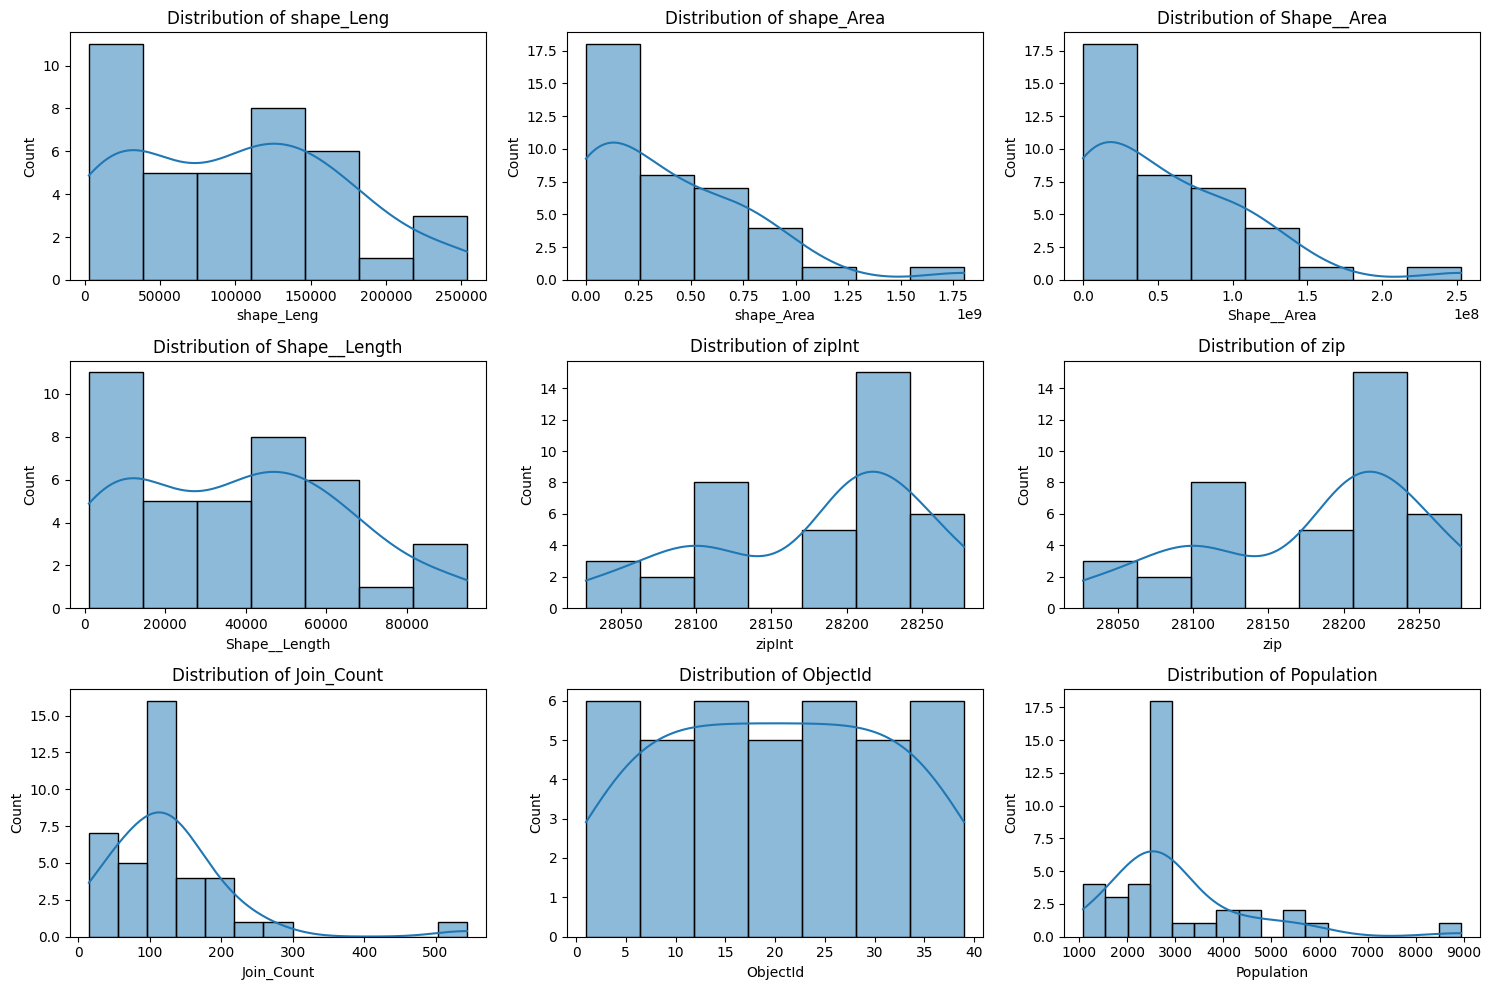

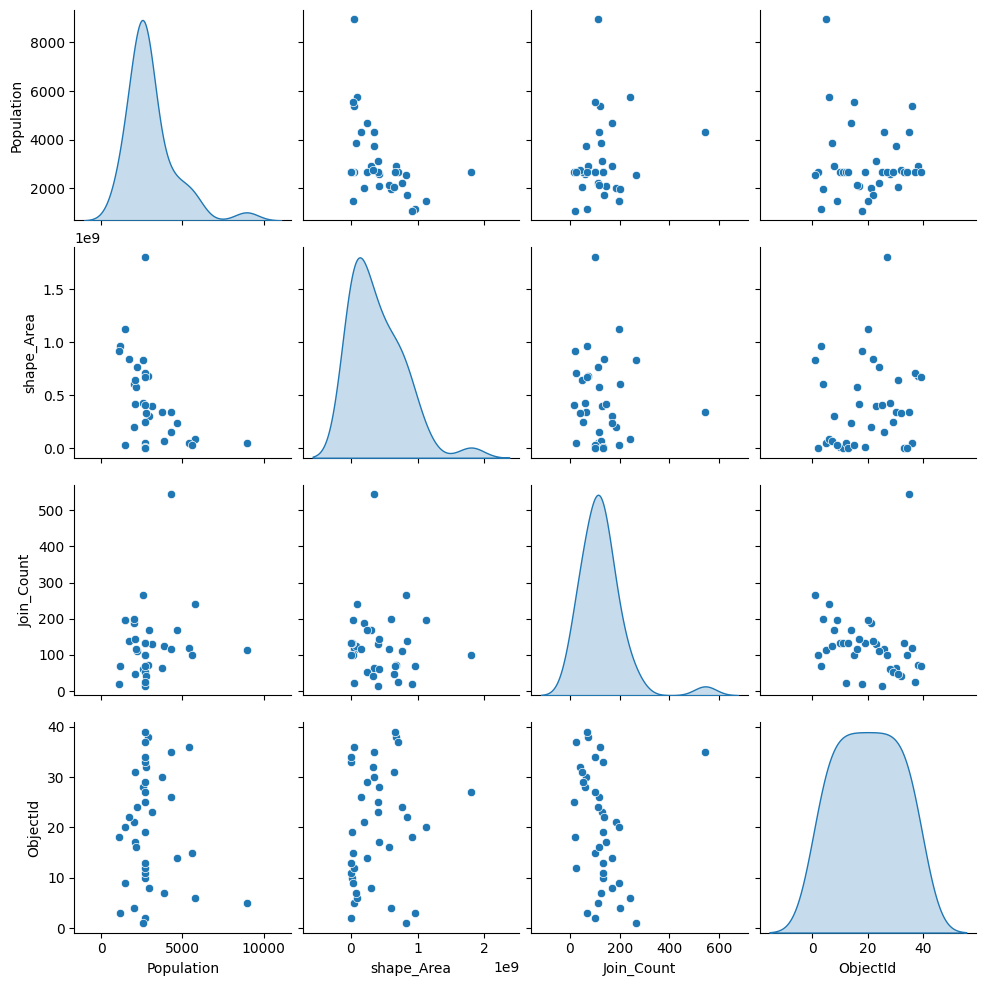

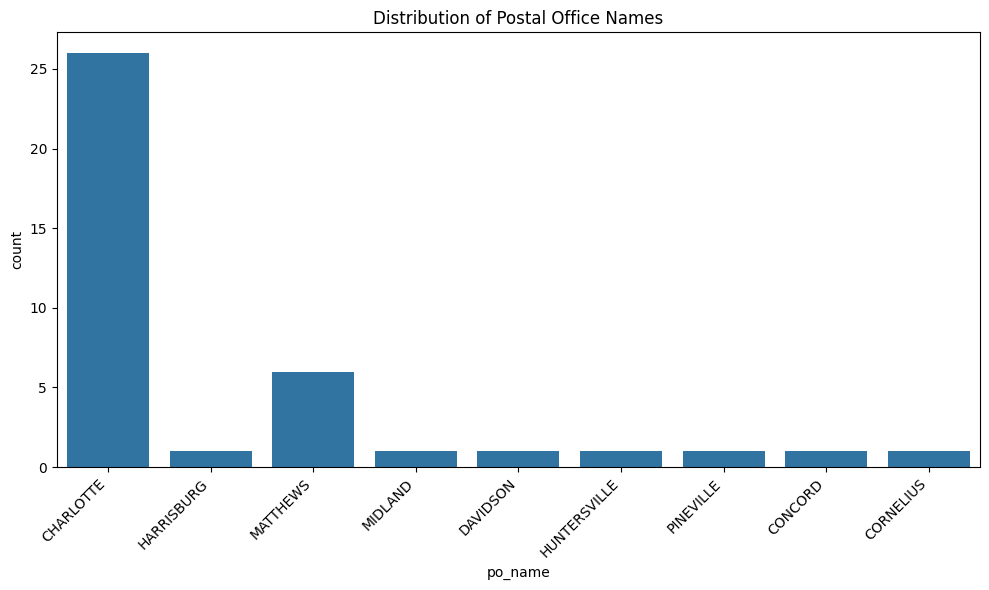

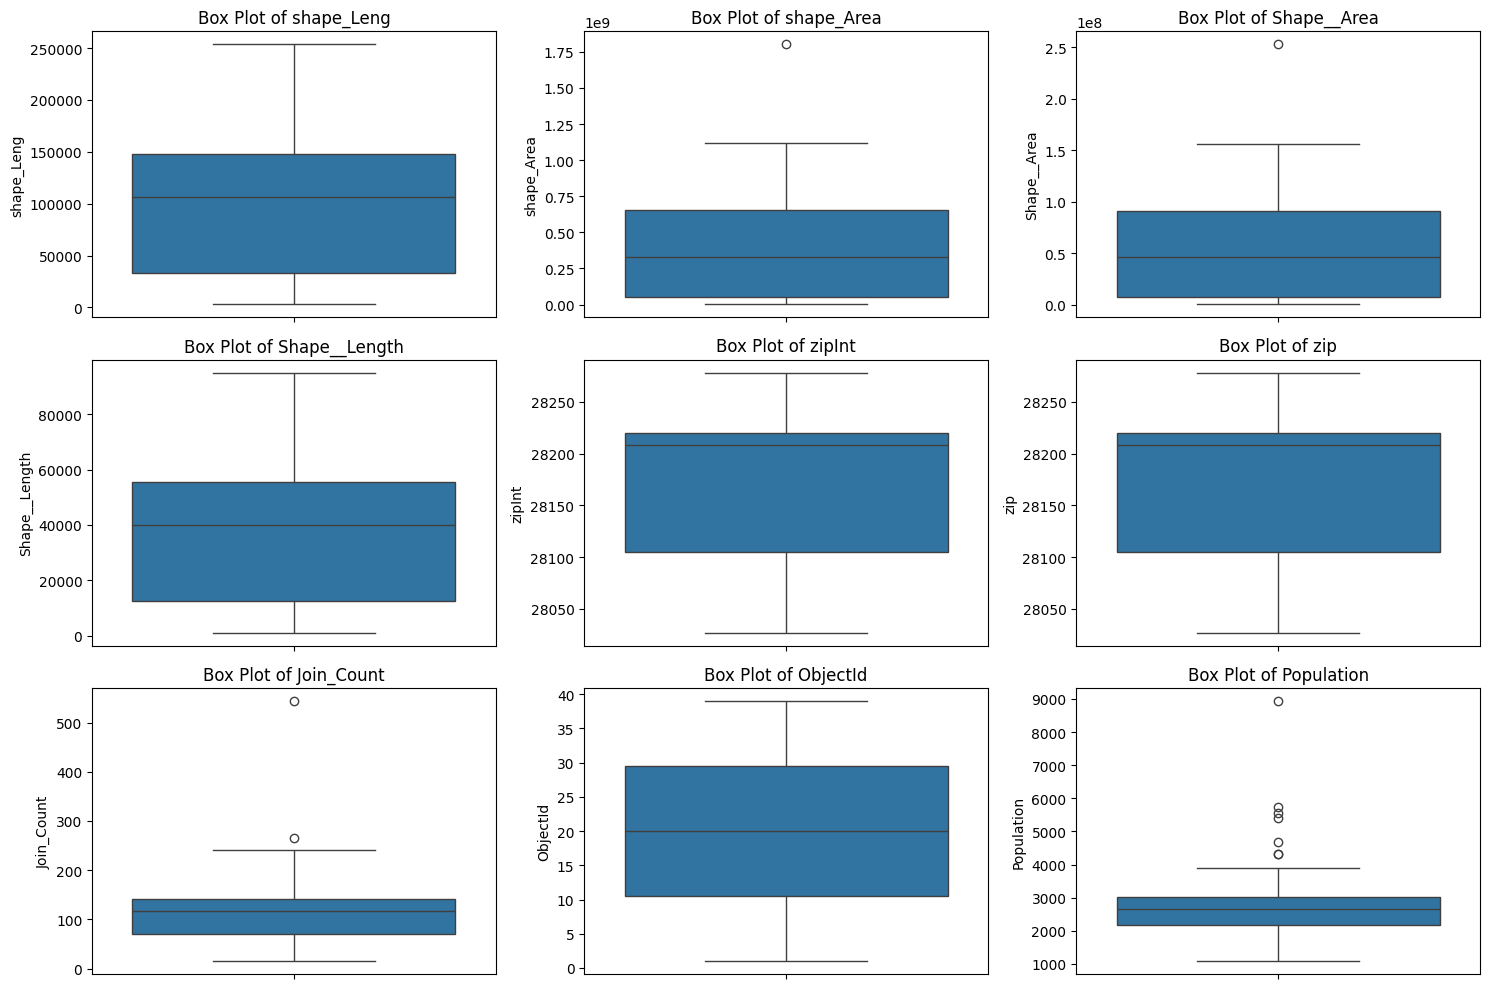

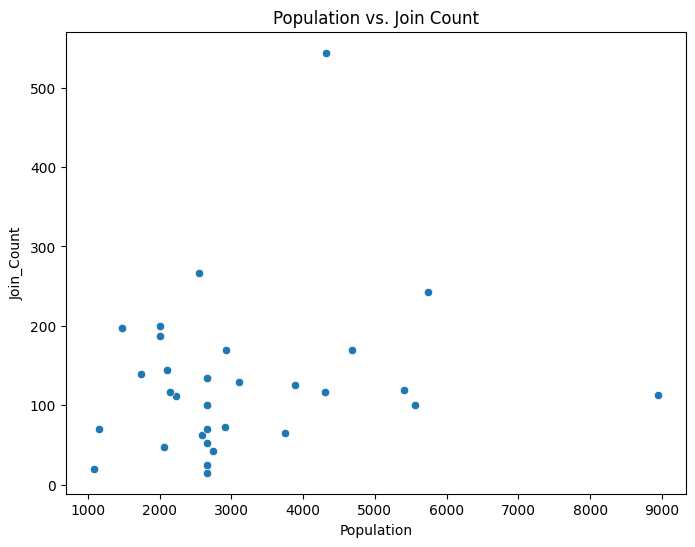

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(15, 10))
numerical_features = ['shape_Leng', 'shape_Area', 'Shape__Area', 'Shape__Length', 'zipInt', 'zip', 'Join_Count', 'ObjectId', 'Population']
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Scatter plot matrix
subset_features = ['Population', 'shape_Area', 'Join_Count', 'ObjectId']
sns.pairplot(df[subset_features], diag_kind='kde')
plt.show()

# Bar chart for 'po_name'
plt.figure(figsize=(10, 6))
sns.countplot(x='po_name', data=df)
plt.title('Distribution of Postal Office Names')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Relationship between 'Population' and 'Join_Count'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Population', y='Join_Count', data=df)
plt.title('Population vs. Join Count')
plt.show()

## Summary:

### 1. Q&A

No questions were posed in the provided data analysis task.


### 2. Data Analysis Key Findings

*   **Population Data Cleaning:** The `Population` column, initially of type 'object' due to commas within the numeric strings, was successfully cleaned. Commas were removed, and the column was converted to numeric, with missing values imputed using the median (approximately 3013).
*   **Population Correlation:** The `Population` column showed negative correlations with shape-related measures ('shape_Leng', 'shape_Area', 'Shape__Area', 'Shape__Length'), suggesting that larger areas correlate with smaller populations in this dataset.  Conversely, `Population` has a positive correlation with `Join_Count`.
*   **Temporal Scope:** All data in the `CreationDate_MIN` column falls within a single day (2020-04-02).
*   **Missing Data:** 13 missing values in the `Population` column were initially identified and addressed through imputation.


### 3. Insights or Next Steps

*   Investigate the negative correlation between population and area.  Are there geographic or zoning factors contributing to this?  Further analysis might include spatial visualizations.
*   Explore the meaning of `Join_Count` and its positive correlation with population.  Understanding the nature of the joins might reveal additional insights into the data and provide context for the correlation.


In [ ]:
import pandas as pd
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Get the actual filename from the uploaded dictionary keys
filename = list(uploaded.keys())[0]  # Assuming only one file was uploaded

# Read the CSV file into a pandas DataFrame
import io
df = pd.read_csv(io.BytesIO(uploaded[filename]))  # Use the actual filename

# Display the first few rows of the DataFrame
display(df.head())

Saving Join_Features_to_CLT_zipcodes.csv to Join_Features_to_CLT_zipcodes (1).csv


,po_name,shape_Leng,shape_Area,Shape__Area,Shape__Length,zipInt,zip,Join_Count,CreationDate_MIN,ObjectId,Population
0,CHARLOTTE,30773.79891,4.981543e+07,6.953170e+06,11499.27819,28202,28202,113,2020/04/02 20:30:04.700+00,5,"8,939.40"
1,HARRISBURG,10472.13397,2.431967e+06,3.404904e+05,3916.88583,28075,28075,100,2020/04/02 20:29:00.805+00,2,NaN
2,CHARLOTTE,48420.35804,8.975605e+07,1.252203e+07,18089.01717,28203,28203,242,2020/04/02 20:30:18.094+00,6,"5,740.60"
3,CHARLOTTE,38924.33194,4.872408e+07,6.798648e+06,14542.69975,28204,28204,119,2020/04/02 20:34:04.075+00,36,"5,400.90"
4,CHARLOTTE,101303.70920,3.396873e+08,4.740434e+07,37845.23711,28205,28205,544,2020/04/02 19:52:00.399+00,35,"4,320.50"


In [ ]:
# Group by zip code and sum the shape area for each zip code
zip_code_areas = df.groupby('zipInt')['shape_Area'].sum().reset_index()
zip_code_areas.rename(columns={'shape_Area': 'total_area'}, inplace=True)
# Display the calculated areas
zip_code_areas.head()

,zipInt,total_area
0,28027,4.043226e+05
1,28031,7.096689e+08
2,28036,4.071844e+08
3,28075,2.431967e+06
4,28078,1.802022e+09


In [ ]:
# Merge the population data with the calculated areas
zip_code_data = pd.merge(zip_code_areas, df[['zipInt', 'Population']], on='zipInt', how='left')
zip_code_data.drop_duplicates(subset=['zipInt'], inplace=True)
# Display the merged data
zip_code_data.head()

,zipInt,total_area,Population
0,28027,4.043226e+05,NaN
1,28031,7.096689e+08,NaN
2,28036,4.071844e+08,NaN
3,28075,2.431967e+06,NaN
4,28078,1.802022e+09,NaN


In [ ]:
# Calculate population density
zip_code_data['population_density'] = pd.to_numeric(zip_code_data['Population'].str.replace(',', '', regex=False)).astype(float) / zip_code_data['total_area']
# Display the data with population density
zip_code_data.head()


,zipInt,total_area,Population,population_density
0,28027,4.043226e+05,NaN,NaN
1,28031,7.096689e+08,NaN,NaN
2,28036,4.071844e+08,NaN,NaN
3,28075,2.431967e+06,NaN,NaN
4,28078,1.802022e+09,NaN,NaN


Zip Codes with Highest Population Density:
    zipInt  population_density
29   28223            0.000211
13   28202            0.000179
15   28204            0.000111
14   28203            0.000064
18   28207            0.000055


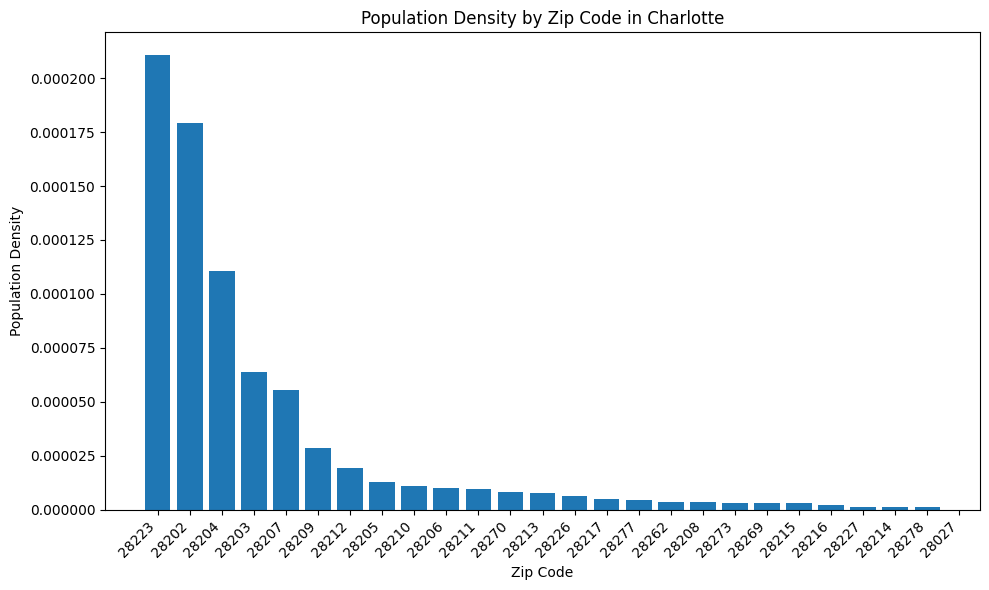

In [ ]:
import matplotlib.pyplot as plt
# Sort by population density in descending order
zip_code_data = zip_code_data.sort_values(by=['population_density'], ascending=False)
# Display the zip codes with highest population density
print("Zip Codes with Highest Population Density:")
print(zip_code_data[['zipInt', 'population_density']].head())

# Create a bar chart to visualize population density
plt.figure(figsize=(10, 6))
plt.bar(zip_code_data['zipInt'].astype(str), zip_code_data['population_density'])
plt.xlabel("Zip Code")
plt.ylabel("Population Density")
plt.title("Population Density by Zip Code in Charlotte")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()